# Objective:- This is a usecase where we need to identify the deaths and recovered cases of covid-19 virus in United_States.

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
cov_df=pd.read_csv('Covid19_2.csv')

In [3]:
cov_df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
cov_df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


# Attribute Information

Province_State - The name of the State within the USA.

Country_Region - The name of the Country (US).

Last_Update - The most recent date the file was pushed.

Lat - Latitude.

Long_ - Longitude.

Confirmed - Aggregated confirmed case count for the state.

Deaths - Aggregated Death case count for the state.

Recovered - Aggregated Recovered case count for the state.

Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).

FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.

Incident_Rate - confirmed cases per 100,000 persons.

People_Tested - Total number of people who have been tested.

People_Hospitalized - Total number of people hospitalized.

Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.

UID - Unique Identifier for each row entry.

ISO3 - Officialy assigned country code identifiers.

Testing_Rate - Total number of people tested per 100,000 persons.

Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.

In [5]:
#finding the number of rows and columns in the dataset
cov_df.shape

(58, 18)

In [6]:
#finding the information about the datset
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [7]:
#finding the unique values present in Province_state
print(cov_df['Province_State'].unique())
#finding number of values with a province_state
print("\n")
print(cov_df['Province_State'].value_counts())

['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


South Carolina              1
Mississippi                 1
Indiana                     1
Missouri                    1
Guam                        1
Washington                  1
Texas                       1
Florida                     1
Georgia                     1
Pue

In [8]:
#finding the unique values present in ISO3
print(cov_df['ISO3'].unique())
#finding number of values with a ISO3
print("\n")
print(cov_df['ISO3'].value_counts())

['USA' 'ASM' 'GUM' 'MNP' 'PRI' 'VIR']


USA    53
MNP     1
GUM     1
PRI     1
ASM     1
VIR     1
Name: ISO3, dtype: int64


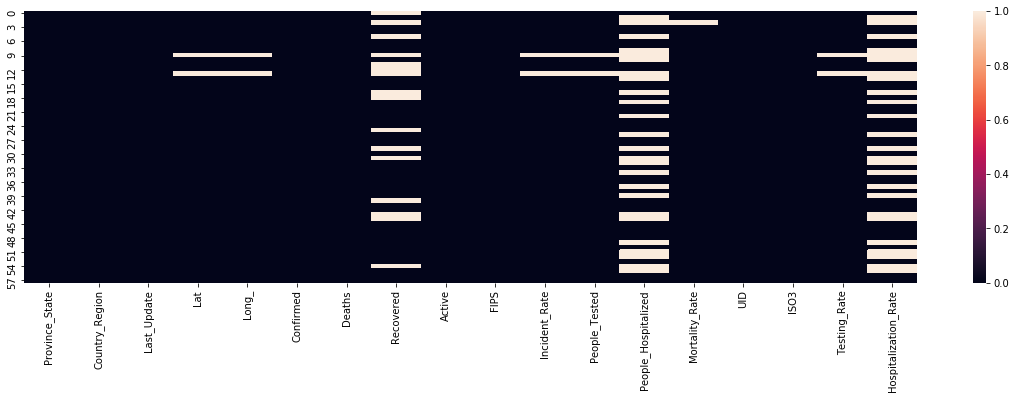

In [9]:
#CHECKING FOR NULL VALUES
plt.figure(figsize=(20,5))
sns.heatmap(cov_df.isnull())

In [10]:
cov_df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [11]:
#replacing nan values in lattitude with the mean of the column lat
lat_mean=cov_df['Lat'].mean()
print(lat_mean)
cov_df['Lat']=cov_df['Lat'].fillna(lat_mean)

36.840089285714285


In [12]:
#replacing nan values in longitude with the mean of the column long_
long_mean=cov_df['Long_'].mean()
print(long_mean)
cov_df['Long_']=cov_df['Long_'].fillna(long_mean)

-85.2066142857143


In [13]:
#replacing nan values in Recovered with the mean of the column Recovered
rec_mean=cov_df['Recovered'].mean()
print(rec_mean)
cov_df['Recovered']=cov_df['Recovered'].fillna(rec_mean)

7007.428571428572


In [14]:
#replacing nan values in Incident_Rate with the mean of the column Incident_Rate
incn_mean=cov_df['Incident_Rate'].mean()
print(incn_mean)
cov_df['Incident_Rate']=cov_df['Incident_Rate'].fillna(incn_mean)

396.23080551083666


In [15]:
#replacing nan values in People_Tested with the mean of the column People_Tested
pep_mean=cov_df['People_Tested'].mean()
print(pep_mean)
cov_df['People_Tested']=cov_df['People_Tested'].fillna(pep_mean)

225853.4107142857


In [16]:
#replacing nan values in People_Hospitalized with the mean of the column People_Hospitalized
pephos_mean=cov_df['People_Hospitalized'].mean()
print(pephos_mean)
cov_df['People_Hospitalized']=cov_df['People_Hospitalized'].fillna(pephos_mean)

4897.454545454545


In [17]:
#replacing nan values in Mortality_Rate  with the mean of the column Mortality_Rate
mortal_mean=cov_df['Mortality_Rate'].mean()
print(mortal_mean)
cov_df['Mortality_Rate']=cov_df['Mortality_Rate'].fillna(mortal_mean)

4.458247989218647


In [18]:
#replacing nan values in Mortality_Rate  with the mean of the column Mortality_Rate
testing_mean=cov_df['Testing_Rate'].mean()
print(testing_mean)
cov_df['Testing_Rate']=cov_df['Testing_Rate'].fillna(testing_mean)

3894.186869685221


In [19]:
#replacing nan values in Mortality_Rate  with the mean of the column Mortality_Rate
hos_rate_mean=cov_df['Hospitalization_Rate'].mean()
print(hos_rate_mean)
cov_df['Hospitalization_Rate']=cov_df['Hospitalization_Rate'].fillna(hos_rate_mean)

14.342541433640415


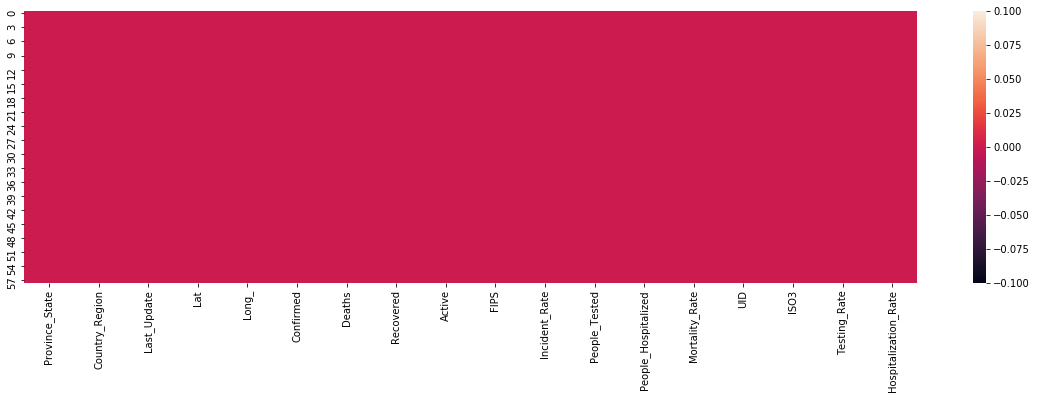

In [20]:
#RECHECKING FOR NULL VALUES
plt.figure(figsize=(20,5))
sns.heatmap(cov_df.isnull())

In [21]:
cov_df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [22]:
#there dodnot exits any more null value in the dataset

# Bivariate analysis

Text(0.5, 1.0, 'Death Rate AS PER CONFIRMED RATE')

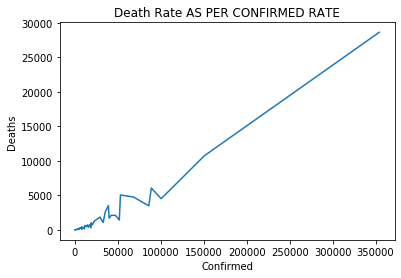

In [23]:
sns.lineplot(cov_df['Confirmed'],cov_df['Deaths'])
plt.title('Death Rate AS PER CONFIRMED RATE')

Text(0.5, 1.0, 'Recover Rate AS PER CONFIRMED RATE')

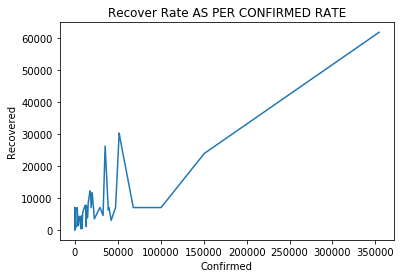

In [24]:
sns.lineplot(cov_df['Confirmed'],cov_df['Recovered'])
plt.title('Recover Rate AS PER CONFIRMED RATE')

Text(0.5, 1.0, 'Death Rate AS PER CONFIRMED RATE')

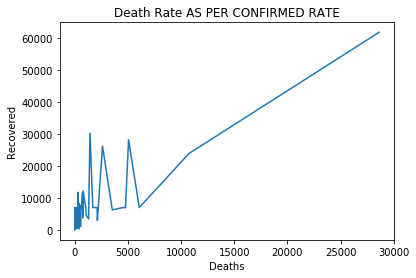

In [25]:
sns.lineplot(cov_df['Deaths'],cov_df['Recovered'])
plt.title('Death Rate AS PER CONFIRMED RATE')

Text(0.5, 1.0, 'Death rate as per Provine_state')

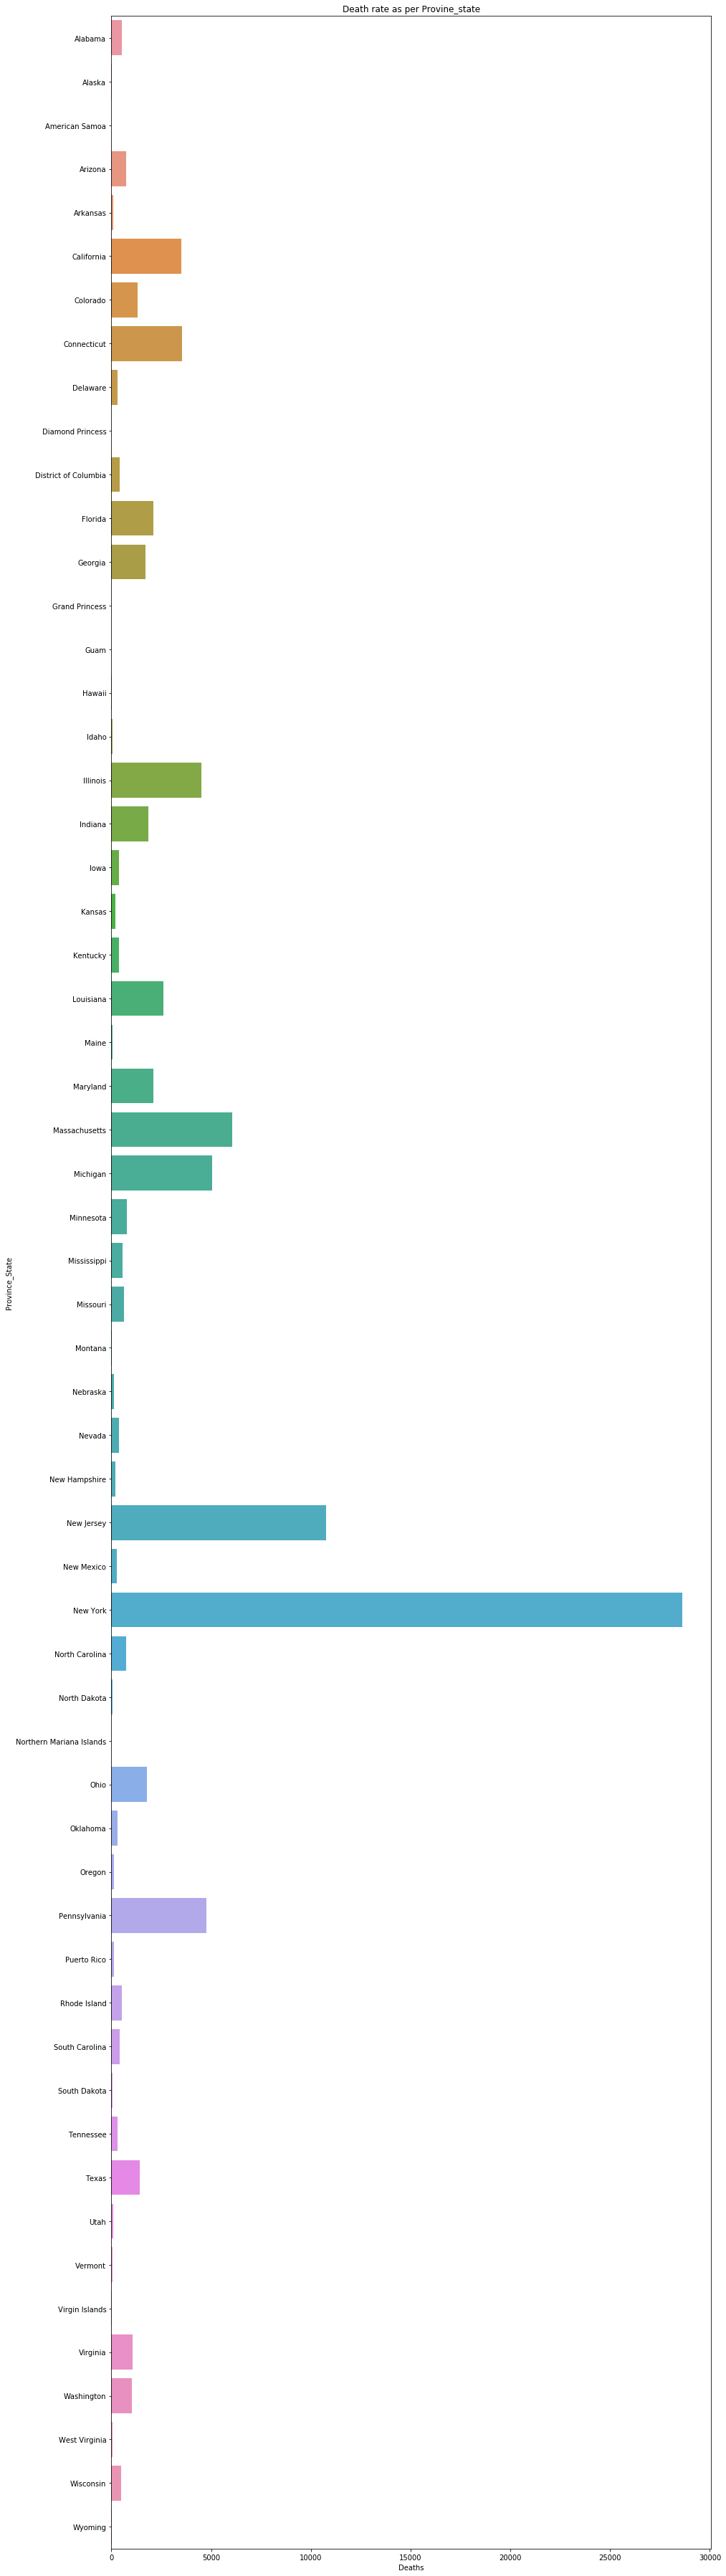

In [26]:
plt.figure(figsize=(15,65))
sns.barplot(cov_df['Deaths'],cov_df['Province_State'])
plt.title('Death rate as per Provine_state')

Text(0.5, 1.0, 'Recover rate as per Provine_state')

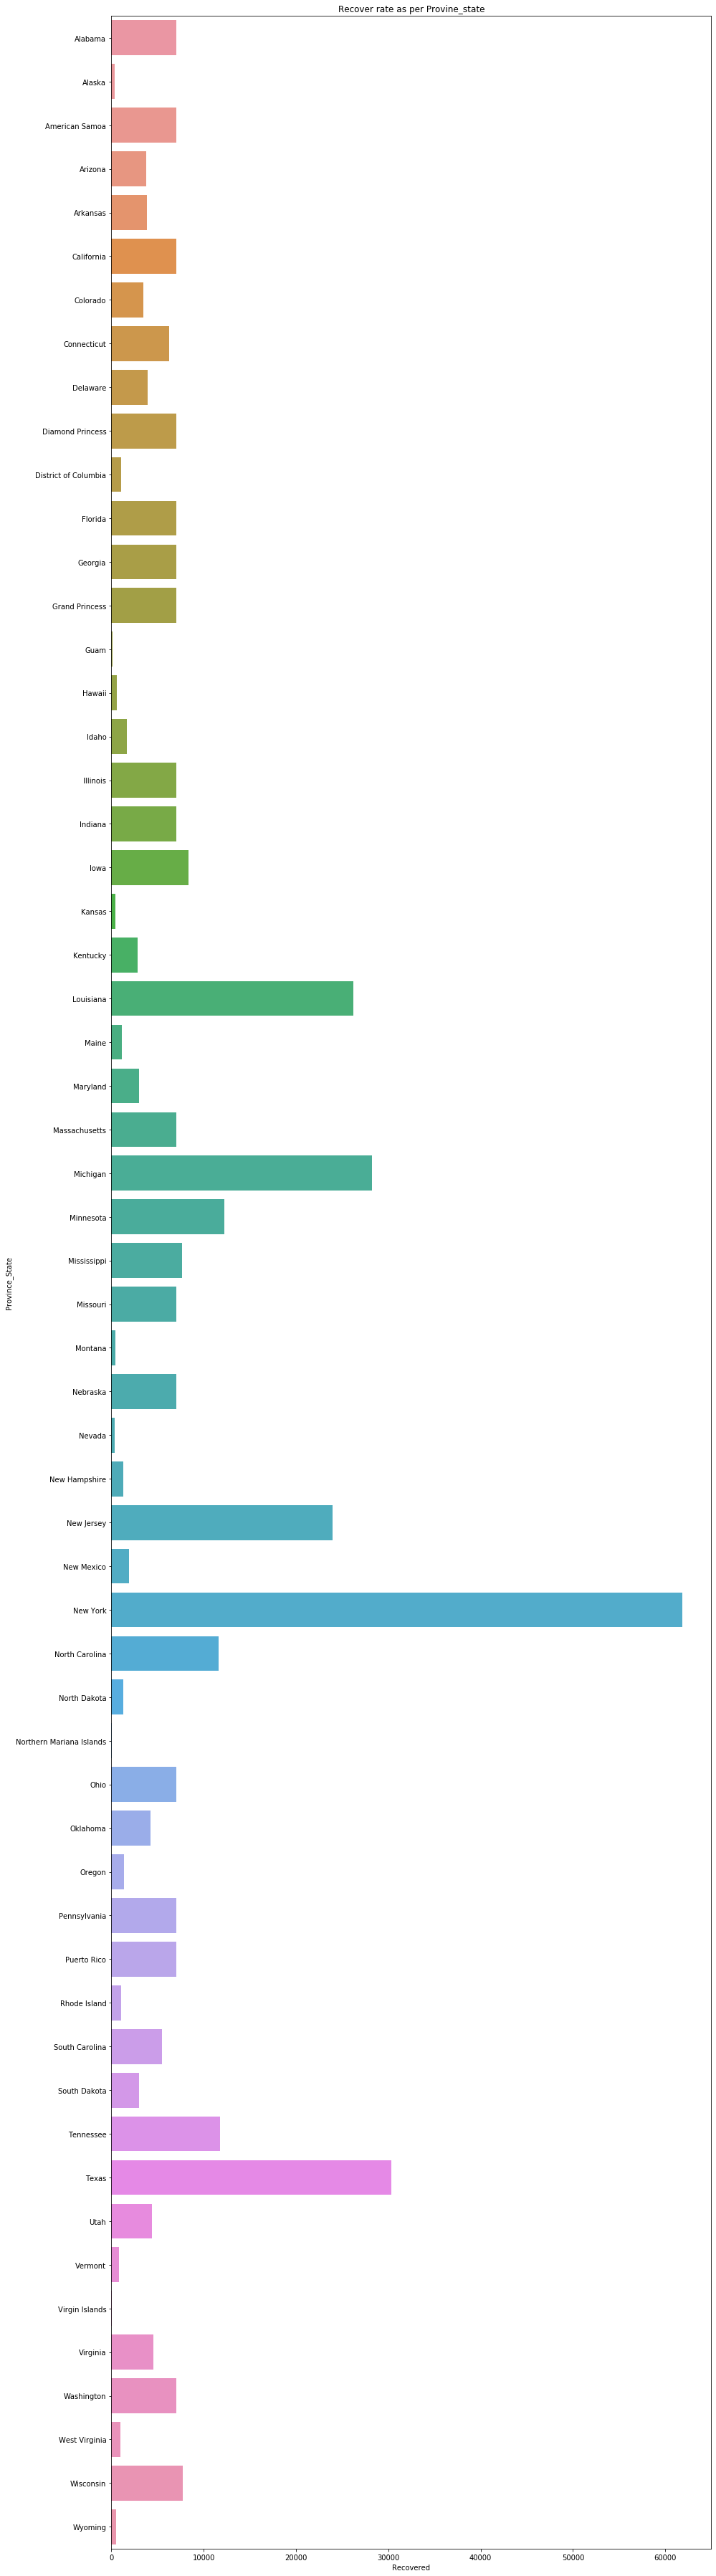

In [27]:
plt.figure(figsize=(15,65))
sns.barplot(cov_df['Recovered'],cov_df['Province_State'])
plt.title('Recover rate as per Provine_state')

Text(0.5, 1.0, 'Confrmed rate as per Provine_state')

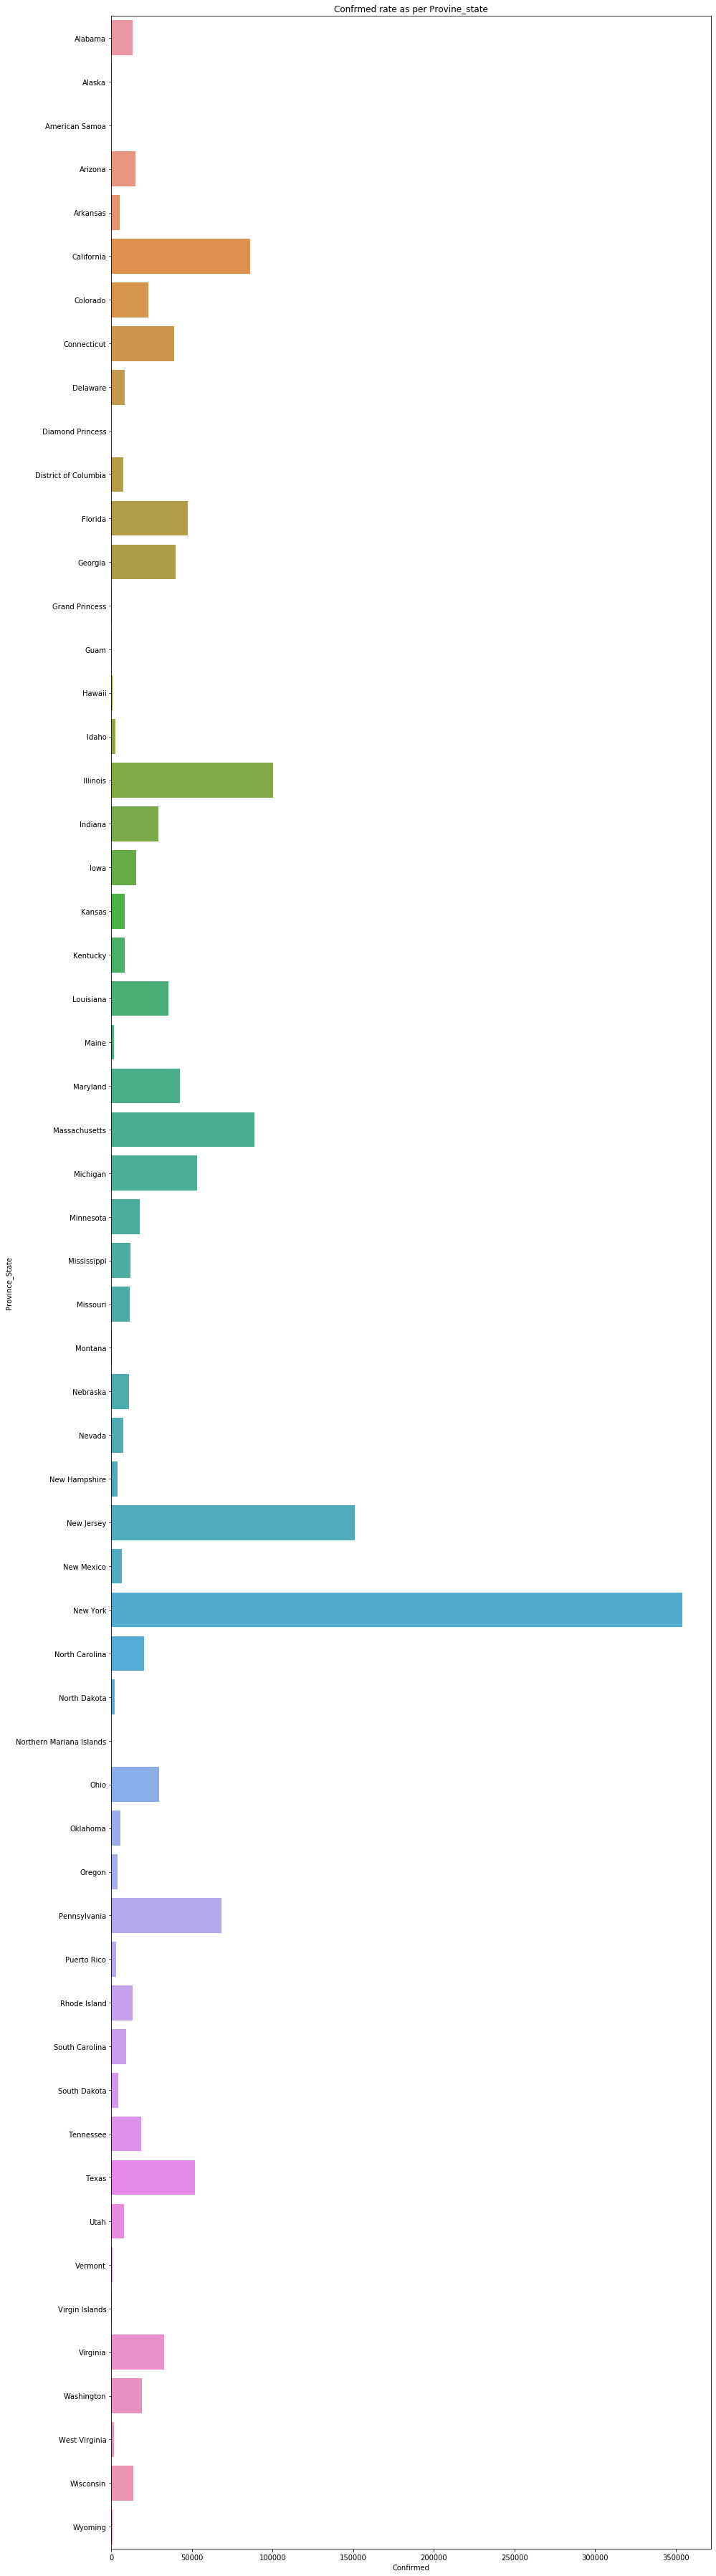

In [28]:
plt.figure(figsize=(15,65))
sns.barplot(cov_df['Confirmed'],cov_df['Province_State'])
plt.title('Confrmed rate as per Provine_state')

Text(0.5, 1.0, 'Mortality rate as per Provine_state')

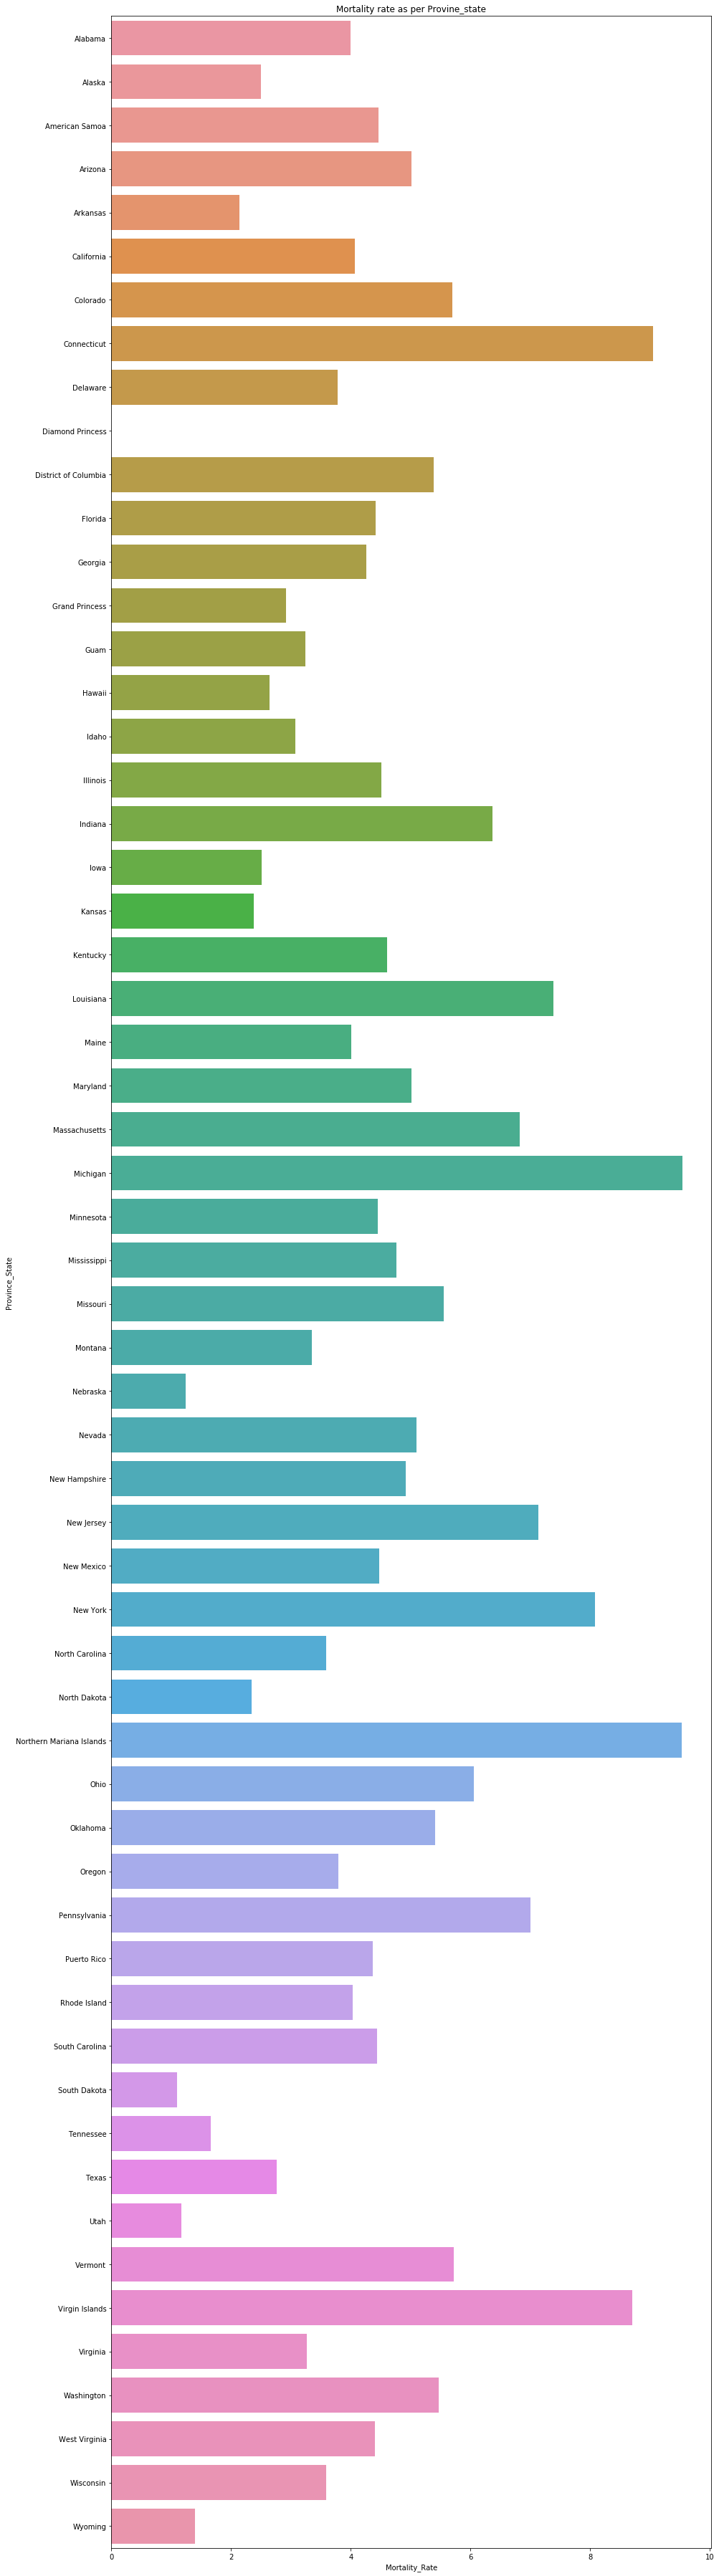

In [29]:
plt.figure(figsize=(15,65))
sns.barplot(cov_df['Mortality_Rate'],cov_df['Province_State'])
plt.title('Mortality rate as per Provine_state')

Text(0.5, 1.0, 'Recover Rate as per Hospitalization_Rate')

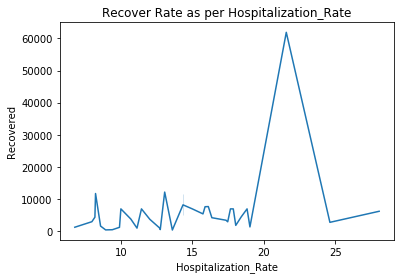

In [30]:
sns.lineplot(cov_df['Hospitalization_Rate'],cov_df['Recovered'])
plt.title('Recover Rate as per Hospitalization_Rate')

Text(0.5, 1.0, 'Death Rate as per Hospitalization_Rate')

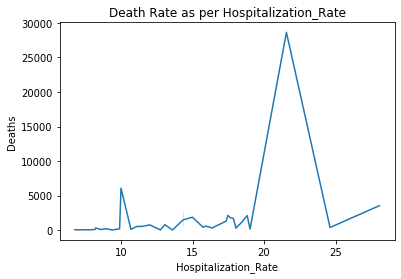

In [31]:
sns.lineplot(cov_df['Hospitalization_Rate'],cov_df['Deaths'])
plt.title('Death Rate as per Hospitalization_Rate')

Text(0.5, 1.0, 'Active cases as per Provine_state')

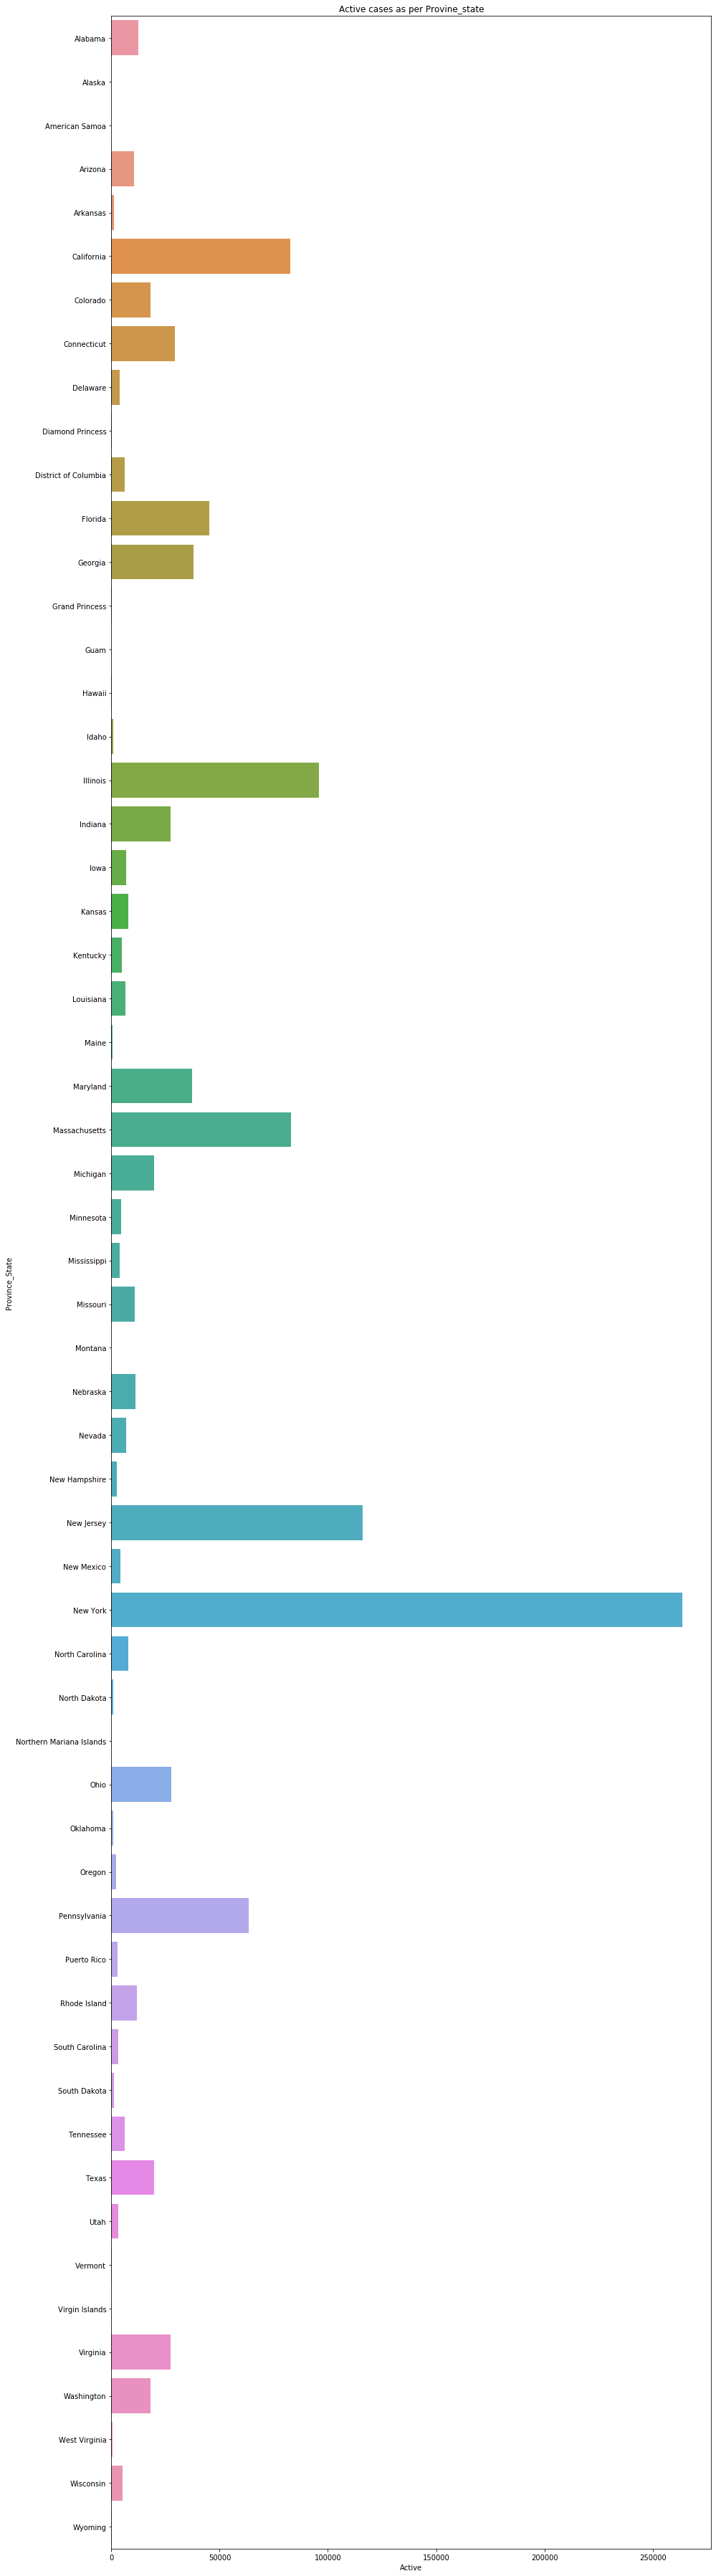

In [32]:
plt.figure(figsize=(15,65))
sns.barplot(cov_df['Active'],cov_df['Province_State'])
plt.title('Active cases as per Provine_state')

Text(0.5, 1.0, 'Confirmed Rate as People Tested')

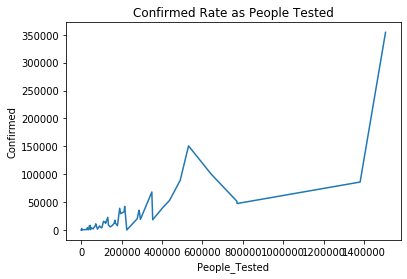

In [33]:
sns.lineplot(cov_df['People_Tested'],cov_df['Confirmed'])
plt.title('Confirmed Rate as People Tested')

In [34]:
cov_df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [35]:
cov_df.drop(['Country_Region','Last_Update','Lat','Long_'],axis=1,inplace=True)

In [36]:
#using label_Encoder to change categorical values of province state and ISO3 column to num,eric
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
cov_df['Province_State']=lb.fit_transform(cov_df['Province_State'])
cov_df['ISO3']=lb.fit_transform(cov_df['ISO3'])

In [37]:
cov_df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,1,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,4,5063.940017,14.342541
2,2,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,0,222.857246,14.342541
3,3,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,4,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,4,3189.670370,10.693584


# univariate analysis

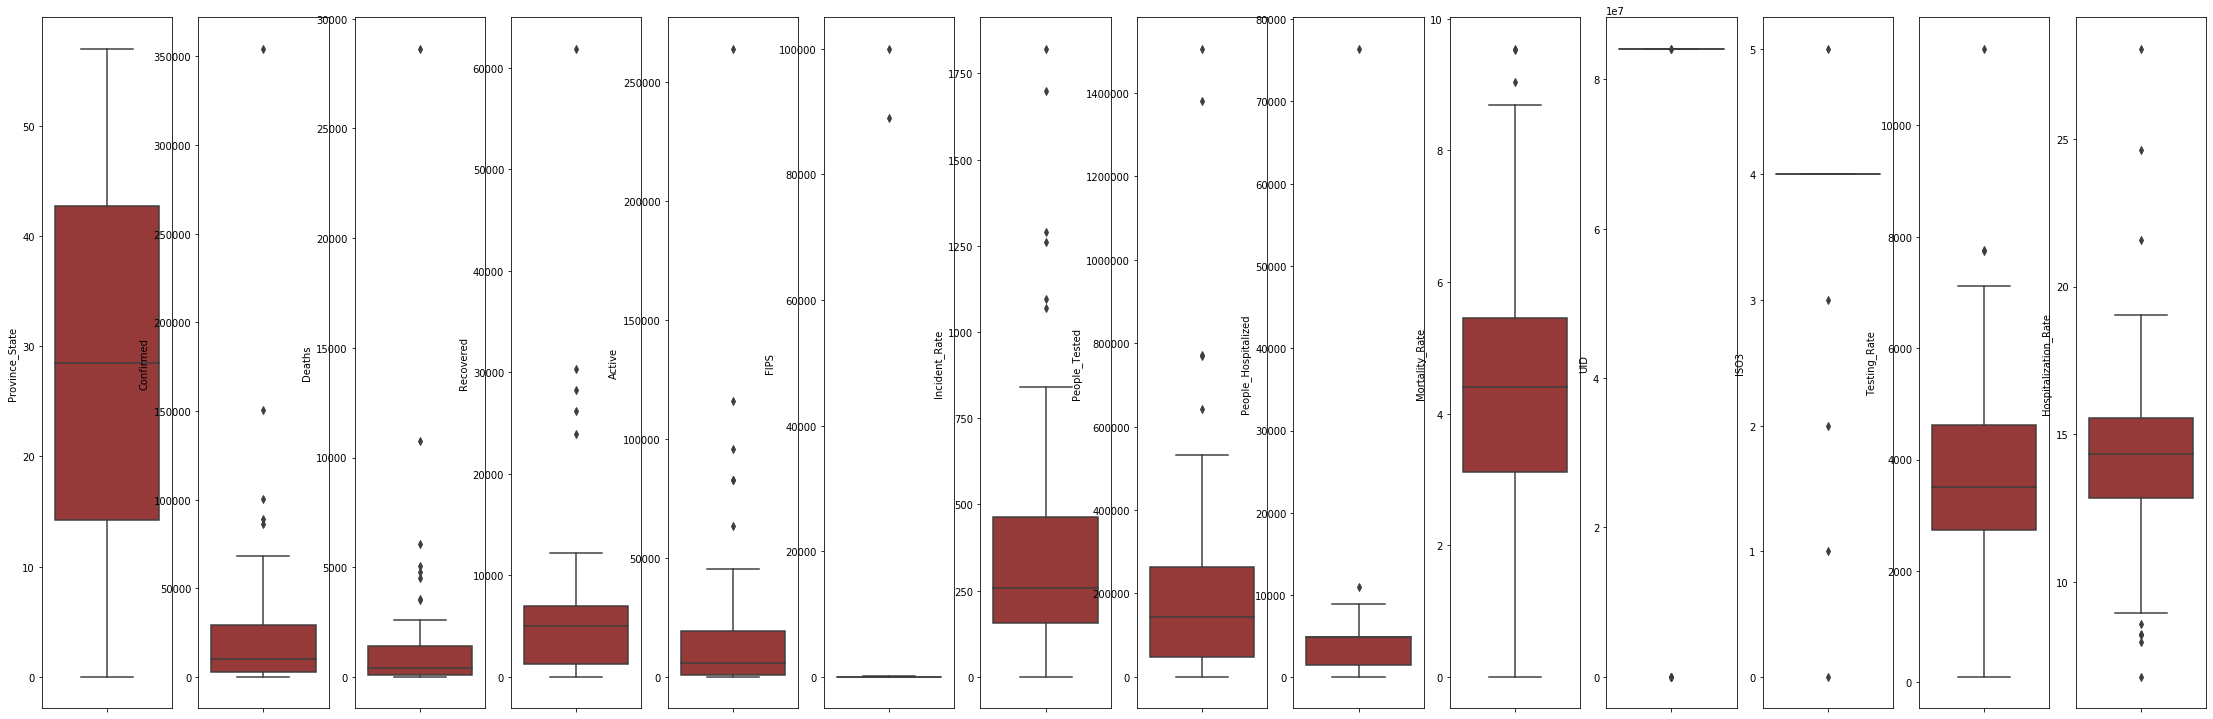

In [38]:
#using boxplot to see outliers and IQR range
collist=cov_df.columns.values
ncol=18
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(cov_df[collist[i]],color='brown',orient='v')

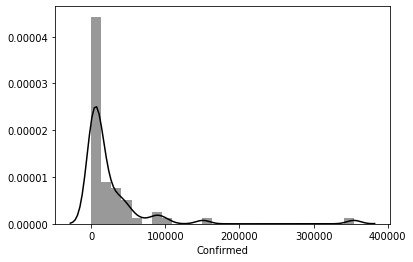

In [39]:
sns.distplot(cov_df['Confirmed'],color='black')

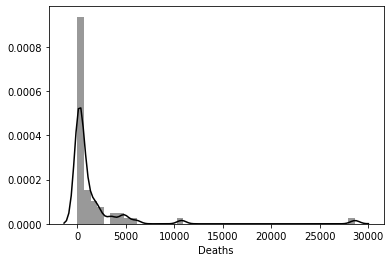

In [40]:
sns.distplot(cov_df['Deaths'],color='black')

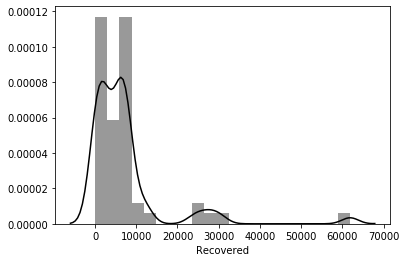

In [41]:
sns.distplot(cov_df['Recovered'],color='black')

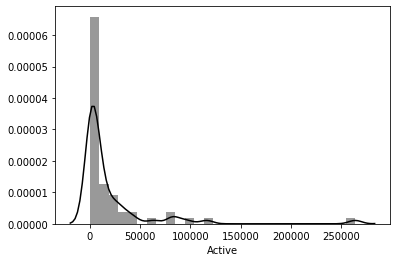

In [42]:
sns.distplot(cov_df['Active'],color='black')

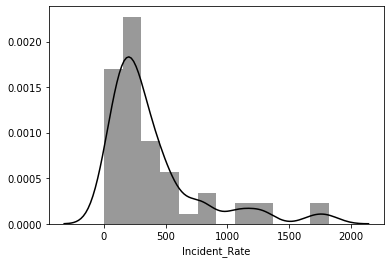

In [43]:
sns.distplot(cov_df['Incident_Rate'],color='black')

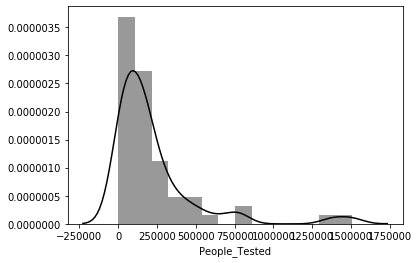

In [44]:
sns.distplot(cov_df['People_Tested'],color='black')

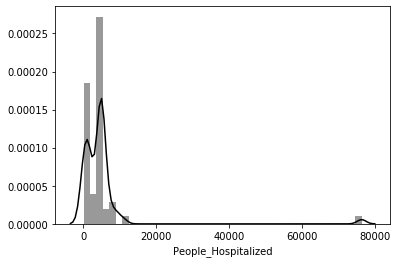

In [45]:
sns.distplot(cov_df['People_Hospitalized'],color='black')

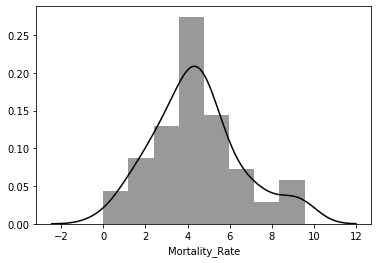

In [46]:
sns.distplot(cov_df['Mortality_Rate'],color='black')

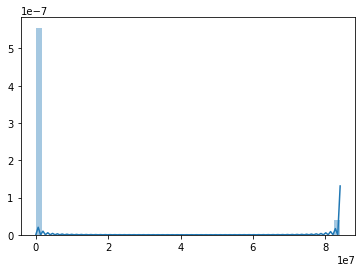

In [47]:
sns.distplot(cov_df)

# Statistical Analysis

In [48]:
cov_df.describe()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,28.500000,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3.844828,3894.186870,14.342541
std,16.886879,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,0.720665,1898.951207,3.781861
min,0.000000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,0.000000,97.702058,6.778043
25%,14.250000,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,4.000000,2741.843521,12.829963
50%,28.500000,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,4.000000,3501.526835,14.342541
75%,42.750000,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4.000000,4622.586404,15.552021
max,57.000000,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,5.000000,11377.424693,28.054438


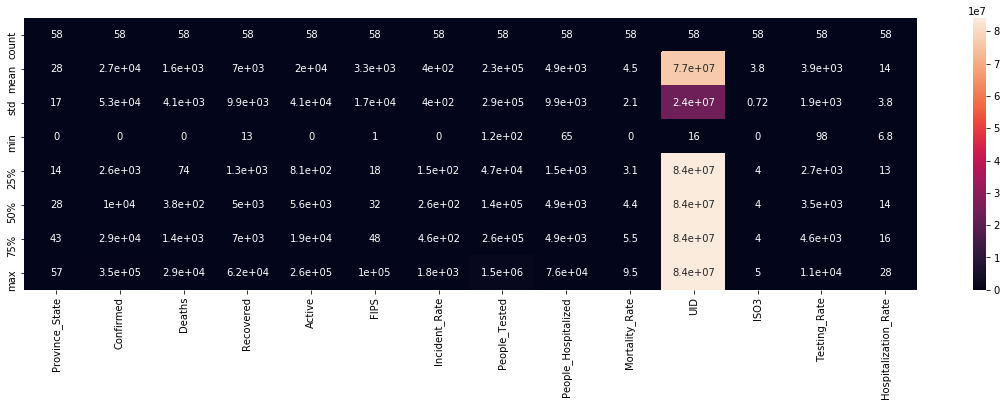

In [49]:
plt.figure(figsize=(20,5))
sns.heatmap(cov_df.describe(),annot=True)

In [50]:
cov_cor=cov_df.corr()

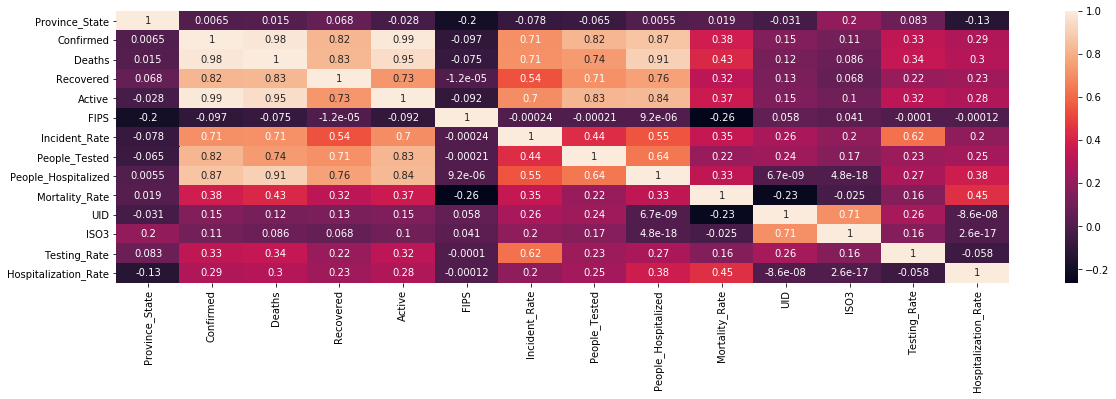

In [51]:
plt.figure(figsize=(20,5))
sns.heatmap(cov_cor,annot=True)

In [52]:
#checking the skewness
cov_df.skew()

Province_State          0.000000
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [53]:
#the dataset is positively skewed as well as negatively skewed

# Removing outliers and skewness from the dataset

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(cov_df))
print(z)

[[1.70244092e+00 2.62999251e-01 2.68934023e-01 0.00000000e+00
  1.84202386e-01 1.90471516e-01 3.31615693e-01 2.11041917e-01
  3.47604767e-01 2.18727182e-01 3.06995177e-01 2.17198770e-01
  2.86980973e-01 7.74497410e-01]
 [1.64270615e+00 5.05788407e-01 3.95372994e-01 6.78047590e-01
  4.89328519e-01 1.90413571e-01 8.70668532e-01 6.48929571e-01
  0.00000000e+00 9.36418161e-01 3.06995220e-01 2.17198770e-01
  6.21379592e-01 4.73806709e-16]
 [1.58297138e+00 5.13484119e-01 3.97842505e-01 0.00000000e+00
  4.90281199e-01 1.87052738e-01 1.01045759e+00 7.75826083e-01
  0.00000000e+00 4.23371775e-16 3.25578286e+00 5.38170286e+00
  1.95023139e+00 4.73806709e-16]
 [1.52323661e+00 2.27418578e-01 2.13370022e-01 3.29519951e-01
  2.36575329e-01 1.90297680e-01 4.88210372e-01 2.07656498e-01
  3.17075993e-01 2.63675605e-01 3.06995304e-01 2.17198770e-01
  8.61258492e-01 6.18955558e-01]
 [1.46350184e+00 4.17470037e-01 3.71418736e-01 3.21471520e-01
  4.64778702e-01 1.90239734e-01 5.87682563e-01 4.45416038e-01


In [55]:
threhold=3

In [56]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([ 2,  2,  5,  7,  9, 13, 14, 14, 34, 36, 36, 36, 36, 36, 36, 36, 39,
       44, 45, 52], dtype=int64), array([10, 11,  7, 13,  5,  5, 10, 11,  6,  1,  2,  3,  4,  6,  7,  8, 10,
       10, 12, 10], dtype=int64))


In [57]:
z[2][10]#checking the above output result 

3.255782862134185

In [58]:
z[2][11]#checking the above output result 

5.38170286102207

In [59]:
cov_new=cov_df[(z<3).all(axis=1)]  #removing outliers

In [60]:
print("Shape of the dataset before removing outliers",cov_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",cov_new.shape)

Shape of the dataset before removing outliers (58, 14)

 

Shape of the dataset after removing the outliers (46, 14)


In [61]:
#checking skewness after removing outliers
cov_new.skew()

Province_State         -0.006325
Confirmed               1.916809
Deaths                  2.182344
Recovered               2.386170
Active                  2.432932
FIPS                    0.004318
Incident_Rate           1.705832
People_Tested           1.769735
People_Hospitalized     0.321958
Mortality_Rate          0.397815
UID                     0.004318
ISO3                    0.000000
Testing_Rate            1.281475
Hospitalization_Rate    0.163926
dtype: float64

In [62]:
#removing the Skewness
collist=cov_new.columns.values
for i in range(0,len(collist)):
    if cov_new.skew().loc[collist[i]]>0.55:
        cov_new[collist[i]]=np.sqrt(cov_new[collist[i]])

In [63]:
cov_new.skew()

Province_State         -0.006325
Confirmed               0.852115
Deaths                  1.166647
Recovered               1.010899
Active                  1.170247
FIPS                    0.004318
Incident_Rate           0.816982
People_Tested           0.876382
People_Hospitalized     0.321958
Mortality_Rate          0.397815
UID                     0.004318
ISO3                    0.000000
Testing_Rate            0.962676
Hospitalization_Rate    0.163926
dtype: float64

# Splitting the data into training and testing sets for Predicting Recovery rate

In [64]:
cov_new.columns

Index(['Province_State', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

In [65]:
y=cov_new['Recovered']

In [66]:
z=cov_new['Deaths']

In [67]:
cov_new.drop(['Recovered','Deaths'],axis=1,inplace=True)

In [68]:
cov_new.head()

,Province_State,Confirmed,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,114.245350,111.937483,1,16.315463,405.524352,1493.000000,3.999387,84000001,4,57.913232,11.438860
1,1,20.024984,6.244998,2,7.403749,192.470777,4897.454545,2.493766,84000002,4,71.161366,14.342541
3,3,122.090131,101.911727,4,14.310445,406.737016,1792.000000,5.011405,84000004,4,47.674515,12.022005
4,4,70.731888,32.310989,5,12.875667,310.254734,535.000000,2.138717,84000005,4,56.477167,10.693584
6,6,150.986754,134.238594,8,19.896435,363.093652,3955.000000,5.698118,84000008,4,47.847039,17.348774


In [69]:
x=cov_new.iloc[:,:]

In [70]:
x.shape

(46, 12)

In [71]:
x.head()

,Province_State,Confirmed,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,114.245350,111.937483,1,16.315463,405.524352,1493.000000,3.999387,84000001,4,57.913232,11.438860
1,1,20.024984,6.244998,2,7.403749,192.470777,4897.454545,2.493766,84000002,4,71.161366,14.342541
3,3,122.090131,101.911727,4,14.310445,406.737016,1792.000000,5.011405,84000004,4,47.674515,12.022005
4,4,70.731888,32.310989,5,12.875667,310.254734,535.000000,2.138717,84000005,4,56.477167,10.693584
6,6,150.986754,134.238594,8,19.896435,363.093652,3955.000000,5.698118,84000008,4,47.847039,17.348774


In [72]:
y.head()

0    83.710385
1    18.761663
3    61.424751
4    62.064483
6    58.974571
Name: Recovered, dtype: float64

In [73]:
y.shape

(46,)

In [74]:
x.shape

(46, 12)

In [75]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)

In [76]:
x=df_x
print(x)

[[-1.79094738e+00 -7.74046590e-02  2.37050961e-01 -1.80575751e+00
  -1.61240145e-01  3.67241999e-02 -7.24278196e-01 -1.11646166e-01
  -1.80575751e+00  0.00000000e+00 -2.41639529e-01 -7.23172383e-01]
 [-1.73005782e+00 -1.37116517e+00 -1.20799793e+00 -1.74195962e+00
  -1.53449161e+00 -1.10768627e+00  6.51322385e-01 -9.65237958e-01
  -1.74195962e+00  0.00000000e+00  1.05196766e+00  1.10579267e-01]
 [-1.60827869e+00  3.03137450e-02  9.99768093e-02 -1.61436385e+00
  -4.70203525e-01  4.32379850e-02 -6.03464548e-01  4.62103640e-01
  -1.61436385e+00  0.00000000e+00 -1.24139370e+00 -5.55730537e-01]
 [-1.54738913e+00 -6.74897551e-01 -8.51618463e-01 -1.55056597e+00
  -6.91295796e-01 -4.75013507e-01 -1.11136674e+00 -1.16652810e+00
  -1.55056597e+00  0.00000000e+00 -3.81863321e-01 -9.37168021e-01]
 [-1.42561000e+00  4.27099626e-01  5.41956232e-01 -1.35917232e+00
   3.90570135e-01 -1.91190949e-01  2.70515121e-01  8.51426523e-01
  -1.35917232e+00  0.00000000e+00 -1.22454760e+00  9.73777017e-01]
 [-1.

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [78]:
#Finding the best Random state

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lm=LinearRegression() 
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    pred=lm.predict(x_test)
    r_score=r2_score(y_test,pred)
    print("R2 SCORE is equal to :",r_score,"at random state",i)
    
    if r_score > max_score:
        max_score=r_score
        final_rstate=i
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

R2 SCORE is equal to : 0.3139340871119908 at random state 42
R2 SCORE is equal to : 0.619108894221058 at random state 43
R2 SCORE is equal to : 0.4036081569432536 at random state 44
R2 SCORE is equal to : 0.44627589003393997 at random state 45
R2 SCORE is equal to : 0.6485943725858478 at random state 46
R2 SCORE is equal to : 0.8773033014388227 at random state 47
R2 SCORE is equal to : 0.7061462317555249 at random state 48
R2 SCORE is equal to : 0.72488575844317 at random state 49
R2 SCORE is equal to : 0.8410515628245037 at random state 50
R2 SCORE is equal to : 0.2897747139307223 at random state 51
R2 SCORE is equal to : 0.5492841786913566 at random state 52
R2 SCORE is equal to : 0.5168868092125474 at random state 53
R2 SCORE is equal to : 0.9135228187867019 at random state 54
R2 SCORE is equal to : 0.8571962069670768 at random state 55
R2 SCORE is equal to : 0.7324531697578025 at random state 56
R2 SCORE is equal to : 0.8658796670904306 at random state 57
R2 SCORE is equal to : 0.4

In [79]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=89)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(34, 12) (12, 12) (34,) (12,)


In [80]:
lm.coef_

array([ 20.58092334,  48.1297028 , -63.05298459,  -9.46151026,
        17.46969555,  25.84247846,   3.08378555,  -1.21926588,
        -9.46151026,   0.        ,  -8.68877548,   0.82354804])

In [81]:
lm.intercept_

67.89108239477129

In [82]:
#applying regularization techniques to overcome underfit and overfit 

In [83]:
from sklearn.linear_model import Lasso,Ridge

In [84]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.792620327035658


The R2 score is 0.9603314654528091


In [85]:
ri=Ridge(alpha=0.0001)
ri.fit(x_train,y_train)
print(ri.score(x_train,y_train))
print("\n")
predd=ri.predict(x_test)
r_score=r2_score(y_test,predd)
print("The r2_score is",r_score)

0.7926792298433896


The r2_score is 0.9601429193206767


In [86]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
r_score=r2_score(y_test,enrpred)
print("The r2_score is",r_score)
enr.coef_

0.49099301664988687
The r2_score is 0.4450590064981318


array([ 0.75361816,  6.80051067, -0.        ,  0.77872096,  2.24532908,
       10.31544567, -0.22515628,  2.44064779,  0.77739281,  0.        ,
       -0.48770471, -0.17710533])

In [87]:
#Lasso is giving the good result , therefore finalizing it 

In [88]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.792620327035658


The R2 score is 0.9603314654528091


In [89]:
print("ERRORS")


print("MEan Absolute error:",mean_absolute_error(y_test,preed))
print("Mean squared error:",mean_absolute_error(y_test,preed))

print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,preed)))

ERRORS
MEan Absolute error: 7.710780494800448
Mean squared error: 7.710780494800448
Root mean squared error: 9.401921710981261


In [ ]:
#Saving the File
from sklearn.externals import joblib
joblib.dump(ls,"Ls_Covid__19_2.pkl")

# Predecting DeathRate

In [90]:
#Finding the best Random state

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,z_train,z_test=train_test_split(x,z,test_size=0.25,random_state=i)
    lm=LinearRegression() 
    lm.fit(x_train,z_train)
    lm.score(x_train,z_train)
    pred=lm.predict(x_test)
    r_score=r2_score(z_test,pred)
    print("R2 SCORE is equal to :",r_score,"at random state",i)
    
    if r_score > max_score:
        max_score=r_score
        final_rstate=i
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

R2 SCORE is equal to : 0.9885065934885571 at random state 42
R2 SCORE is equal to : 0.9460243738205936 at random state 43
R2 SCORE is equal to : 0.9641751080652102 at random state 44
R2 SCORE is equal to : 0.9773543729156382 at random state 45
R2 SCORE is equal to : 0.9617696866392775 at random state 46
R2 SCORE is equal to : 0.9870440991572872 at random state 47
R2 SCORE is equal to : 0.9684821288406723 at random state 48
R2 SCORE is equal to : 0.987663960234159 at random state 49
R2 SCORE is equal to : 0.9745500578359543 at random state 50
R2 SCORE is equal to : 0.9667303672119427 at random state 51
R2 SCORE is equal to : 0.9384951816321594 at random state 52
R2 SCORE is equal to : 0.9643244894969694 at random state 53
R2 SCORE is equal to : 0.9652569203646878 at random state 54
R2 SCORE is equal to : 0.9837808731165192 at random state 55
R2 SCORE is equal to : 0.977233375684228 at random state 56
R2 SCORE is equal to : 0.9878674423643377 at random state 57
R2 SCORE is equal to : 0.9

In [98]:
#finalizing the train_test_split
x_train,x_test,z_train,z_test=train_test_split(x,z,test_size=0.25,random_state=99)
print(x_train.shape,x_test.shape,z_train.shape,z_test.shape)

(34, 12) (12, 12) (34,) (12,)


In [99]:
lm.coef_

array([11.14042964, 19.80239813,  0.49306724, -5.81301965, -2.19412729,
       -3.75854276, -0.15106232,  5.5489546 , -5.81301965,  0.        ,
        1.29401705, -0.65550233])

In [100]:
lm.intercept_

25.335358572162953

In [101]:
#applying regularization techniques to overcome underfit and overfit 

In [102]:
from sklearn.linear_model import Lasso,Ridge

In [103]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,z_train)
print(ls.score(x_train,z_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(z_test,preed)
print("The R2 score is",r_score)

0.9862507902371176


The R2 score is 0.9916005200469044


In [104]:
ri=Ridge(alpha=0.0001)
ri.fit(x_train,z_train)
print(ri.score(x_train,z_train))
print("\n")
predd=ri.predict(x_test)
r_score=r2_score(z_test,predd)
print("The r2_score is",r_score)

0.9862522702053461


The r2_score is 0.9915744274247847


In [105]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x_train,z_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,z_train))
r_score=r2_score(z_test,enrpred)
print("The r2_score is",r_score)
enr.coef_

0.9185355365677468
The r2_score is 0.8703821753193624


array([-0.17849666,  4.13041052,  2.36676472, -0.20290891,  2.02337092,
        3.23722614,  1.04431162,  4.49235593, -0.20312822,  0.        ,
       -0.        ,  0.        ])

In [106]:
#Lasso is giving the good result , therefore finalizing it 

In [107]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,z_train)
print(ls.score(x_train,z_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(z_test,preed)
print("The R2 score is",r_score)

0.9862507902371176


The R2 score is 0.9916005200469044


In [108]:
#Saving the File
from sklearn.externals import joblib
joblib.dump(ls,"Ls_Covid_19_deathrate_2.pkl")

['Ls_Covid_19_deathrate_2.pkl']